In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data
links=pd.read_csv('data/links.csv')
movies=pd.read_csv('data/movies.csv')
ratings=pd.read_csv("data/ratings.csv")
tags=pd.read_csv('data/tags.csv')


# Q1 Download the data from the above link. How many ".csv" files are available in the dataset?

It's 4

# Q2  and  # Q3

 Find shape of movies and ratings

 

In [3]:
print('Shape of movies is:',movies.shape)
print('Shape of ratings is:',ratings.shape)

Shape of movies is: (9742, 3)
Shape of ratings is: (100836, 4)


# Q4 How many unique "userId" are available in "ratings.csv"?


In [5]:
ratings['userId'].nunique()


610

# Q5 Which movie has recieved maximum number of user ratings?


In [23]:
ratings.groupby(by='movieId')['rating'].count().sort_values(ascending=False)

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
4093        1
4089        1
58351       1
4083        1
193609      1
Name: rating, Length: 9724, dtype: int64

In [24]:
movies[movies['movieId']==356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


# Q6  Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [31]:
movies[movies['title']=='Matrix, The (1999)']['movieId']

1939    2571
Name: movieId, dtype: int64

In [32]:
print(tags.columns)
tags[tags['movieId']==2571]

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


# Q7  What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?
 

In [35]:
movies[movies['title']=='Terminator 2: Judgment Day (1991)']

,movieId,title,genres
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [89]:
ratings[ratings['movieId']==589].mean()

userId       3.065804e+02
movieId      5.890000e+02
rating       3.970982e+00
timestamp    1.105281e+09
dtype: float64

# Q8

In [41]:
movies[movies['title']=='Fight Club (1999)']

,movieId,title,genres
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


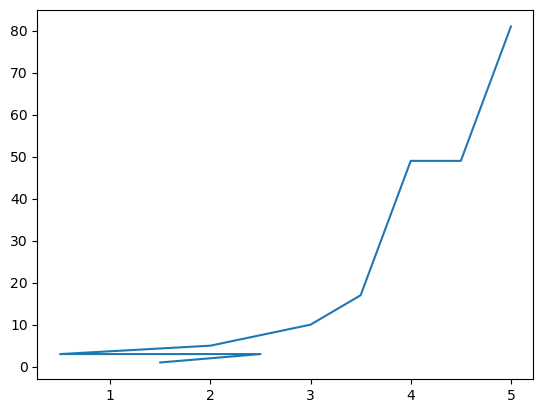

In [56]:
fight_club_ratings=ratings[ratings['movieId']==2959]['rating'].value_counts()
plt.plot(fight_club_ratings)

# Performing Mandatory operations-I


In [101]:
#performing count aggregate over ratings and filtering rows with ratings greater than 50
grouped_count_ratings=ratings.groupby(by='movieId').count()
grouped_count_ratings=grouped_count_ratings[grouped_count_ratings['rating']>50]
grouped_count_ratings

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
6,102,102,102
7,54,54,54
...,...,...,...
106782,54,54,54
109374,52,52,52
109487,73,73,73


In [112]:
# performing inner join
new_movies=grouped_count_ratings.merge(right=movies,how='inner',on='movieId')
new_movies.head()

,movieId,userId,rating,timestamp,title,genres
0,1,215,215,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,110,110,110,Jumanji (1995),Adventure|Children|Fantasy
2,3,52,52,52,Grumpier Old Men (1995),Comedy|Romance
3,6,102,102,102,Heat (1995),Action|Crime|Thriller
4,7,54,54,54,Sabrina (1995),Comedy|Romance


# Q8 Which movie is the most popular based on  average user ratings?


In [137]:
#creating a list of movies whose number of ratings is greater than 50
movieId_greater_50=new_movies['movieId']

In [140]:
# let's aggregate using mean
mean_ratings=ratings.groupby('movieId').mean()
mean_ratings.head()

,userId,rating,timestamp
movieId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08


In [142]:
#Let's merget the mean _ratings with new_movies which contain movies whose n ratings is greater than 50
popular_mean_movies=new_movies.merge(right=mean_ratings,how='inner',on='movieId')
popular_mean_movies.head()

,movieId,userId_x,rating_x,timestamp_x,title,genres,userId_y,rating_y,timestamp_y
0,1,215,215,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,306.530233,3.920930,1.129835e+09
1,2,110,110,110,Jumanji (1995),Adventure|Children|Fantasy,329.554545,3.431818,1.135805e+09
2,3,52,52,52,Grumpier Old Men (1995),Comedy|Romance,283.596154,3.259615,1.005110e+09
3,6,102,102,102,Heat (1995),Action|Crime|Thriller,309.647059,3.946078,1.057817e+09
4,7,54,54,54,Sabrina (1995),Comedy|Romance,279.000000,3.185185,9.665462e+08


In [143]:
#Most popular movie
popular_mean_movies.sort_values(by='rating_y',ascending=False).head()

,movieId,userId_x,rating_x,timestamp_x,title,genres,userId_y,rating_y,timestamp_y
53,318,317,317,317,"Shawshank Redemption, The (1994)",Crime|Drama,302.299685,4.429022,1.189037e+09
117,858,192,192,192,"Godfather, The (1972)",Crime|Drama,297.744792,4.289062,1.215667e+09
273,2959,218,218,218,Fight Club (1999),Action|Crime|Drama|Thriller,319.894495,4.272936,1.294796e+09
169,1276,57,57,57,Cool Hand Luke (1967),Drama,273.210526,4.271930,1.138968e+09
111,750,97,97,97,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,316.824742,4.268041,1.233881e+09


# Q9 Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [108]:
popular_movies=new_movies.sort_values(by='rating',ascending=False)
popular_movies.head()

,movieId,userId,rating,timestamp,title,genres
61,356,329,329,329,Forrest Gump (1994),Comedy|Drama|Romance|War
53,318,317,317,317,"Shawshank Redemption, The (1994)",Crime|Drama
49,296,307,307,307,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
99,593,279,279,279,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
248,2571,278,278,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller


# Q10 Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [110]:
popular_movies[popular_movies['genres'].str.contains('Sci-Fi')].head(3)

,movieId,userId,rating,timestamp,title,genres
248,2571,278,278,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller
44,260,251,251,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
80,480,238,238,238,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller


# Scraping using Links.csv

In [115]:
#Beautiful Soup script for imbd links
#Code
import requests
import numpy as np
import bs4

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = bs4.BeautifulSoup(response.text,"html.parser")
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan


In [116]:
#Let's merge movies with n ratings above 50 with links dataset
movie_links=new_movies.merge(right=links,how='inner',on='movieId')
movie_links

,movieId,userId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,215,215,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,2,110,110,110,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0
2,3,52,52,52,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
3,6,102,102,102,Heat (1995),Action|Crime|Thriller,113277,949.0
4,7,54,54,54,Sabrina (1995),Comedy|Romance,114319,11860.0
...,...,...,...,...,...,...,...,...
431,106782,54,54,54,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,993846,106646.0
432,109374,52,52,52,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0
433,109487,73,73,73,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0
434,112852,59,59,59,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0


In [123]:
#Let's add a column of imdb ratings
movie_links['imdb_ratings']=movie_links['imdbId'].apply(lambda x:scrapper(str(x)))
movie_links

,movieId,userId,rating,timestamp,title,genres,imdbId,tmdbId,imdb_ratings
0,1,215,215,215,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,8.3
1,2,110,110,110,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,7.1
2,3,52,52,52,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,6.6
3,6,102,102,102,Heat (1995),Action|Crime|Thriller,113277,949.0,8.3
4,7,54,54,54,Sabrina (1995),Comedy|Romance,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...,...
431,106782,54,54,54,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,993846,106646.0,8.2
432,109374,52,52,52,"Grand Budapest Hotel, The (2014)",Comedy|Drama,2278388,120467.0,8.1
433,109487,73,73,73,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0,8.7
434,112852,59,59,59,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,2015381,118340.0,8.0


# Q12 Mention the movieId of the movie which has the highest IMDB rating.

In [129]:
movie_links.sort_values(by='imdb_ratings',ascending=False).head()

,movieId,userId,rating,timestamp,title,genres,imdbId,tmdbId,imdb_ratings
53,318,317,317,317,"Shawshank Redemption, The (1994)",Crime|Drama,111161,278.0,9.3
117,858,192,192,192,"Godfather, The (1972)",Crime|Drama,68646,238.0,9.2
146,1203,57,57,57,12 Angry Men (1957),Drama,50083,389.0,9.0
364,7153,185,185,185,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,167260,122.0,9.0
156,1221,129,129,129,"Godfather: Part II, The (1974)",Crime|Drama,71562,240.0,9.0


# Q13 Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [133]:
scifi_movies=movie_links[movie_links['genres'].str.contains('Sci-Fi')]
scifi_movies.head()

,movieId,userId,rating,timestamp,title,genres,imdbId,tmdbId,imdb_ratings
12,32,177,177,177,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,114746,63.0,8.0
30,160,57,57,57,Congo (1995),Action|Adventure|Mystery|Sci-Fi,112715,10329.0,5.3
35,172,53,53,53,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,113481,9886.0,5.6
36,173,62,62,62,Judge Dredd (1995),Action|Crime|Sci-Fi,113492,9482.0,5.6
38,208,115,115,115,Waterworld (1995),Action|Adventure|Sci-Fi,114898,9804.0,6.3


In [136]:
scifi_movies.sort_values(by='imdb_ratings',ascending=False).head()

,movieId,userId,rating,timestamp,title,genres,imdbId,tmdbId,imdb_ratings
424,79132,143,143,143,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,1375666,27205.0,8.8
248,2571,278,278,278,"Matrix, The (1999)",Action|Sci-Fi|Thriller,133093,603.0,8.7
433,109487,73,73,73,Interstellar (2014),Sci-Fi|IMAX,816692,157336.0,8.7
140,1196,211,211,211,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80684,1891.0,8.7
44,260,251,251,251,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76759,11.0,8.6
